#### Finding Minimum Of F(x) Using Multiple Methods

#### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Main (Loss) Function

In [2]:
def main_func( x):
	return ( x ** 6) - ( 2 * ( x ** 5)) + ( 5 * ( x ** 4)) + ( 50 * ( x ** 3)) + ( 15 * ( x ** 2)) - ( 20 * x) + 100

#### Gradient Of Main Function

In [3]:
def gradient( x):
	return ( 6 * ( x ** 5)) - ( 10 * ( x ** 4)) + ( 20 * ( x ** 3)) + ( 150 * ( x ** 2)) + ( 30 * x) - 20

#### Plot Main Function in [-3,2]

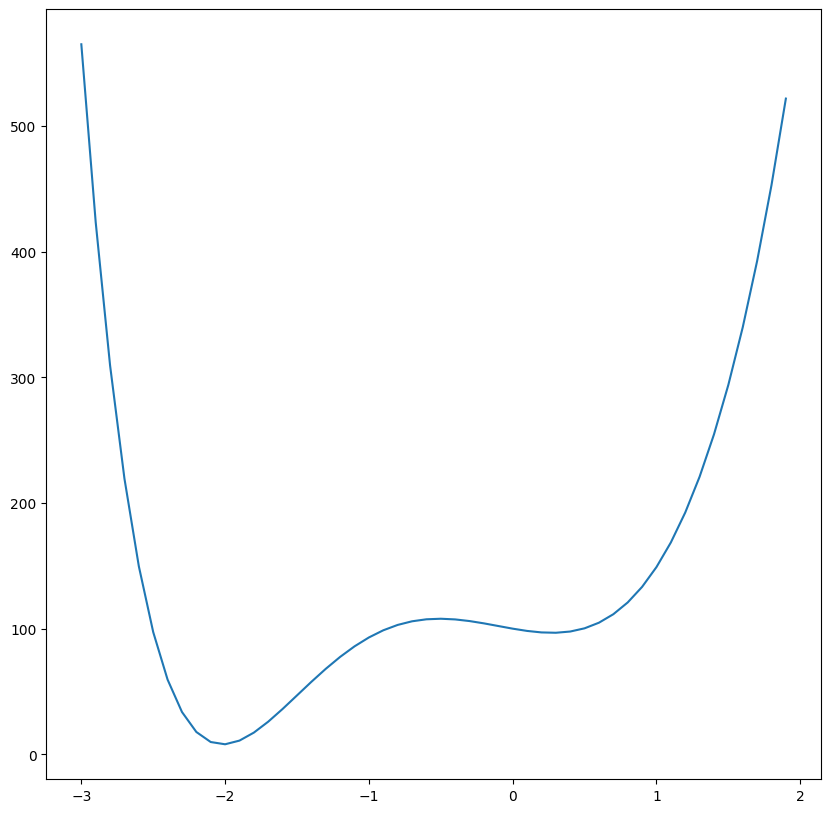

In [4]:
x = np.arange( -3, 2, 0.1)

plt.figure( figsize=( 10, 10))
plt.plot( x, main_func( x))

#### LMS Method

In [5]:
def lms( eta=0.01, n_iter=100):
	x = ( np.random.rand() * 5) - 3

	loss_history = []
	x_history = []

	for i in range( n_iter):
		loss = main_func( x)
		
		loss_history.append( loss)

		x_history.append( x)

		g = gradient( x)

		x -= eta * g

	loss = main_func( x)

	loss_history.append( loss)

	x_history.append( x)

	return x, np.array( x_history), np.array( loss_history)

#### Finding Minimum Using LMS Method

Last Value Of X: -2.0166201189629605
Last Value Of Loss: 7.933015133086229


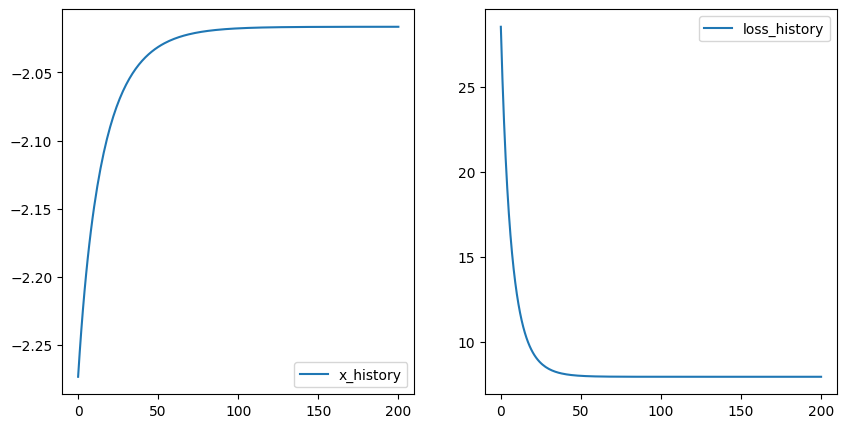

In [17]:
x, x_history, loss_history = lms( 1e-4, 200)

print( f"Last Value Of X: { x}")
print( f"Last Value Of Loss: { loss_history[ -1]}")

plt.figure( figsize=( 10, 5))

plt.subplot( 1, 2, 1)
plt.plot( x_history, label="x_history")
plt.legend()

plt.subplot( 1, 2, 2)
plt.plot( loss_history, label="loss_history")
plt.legend()

#### LMS with Momentum

In [7]:
def lms_momentum( learning_rate=0.01, momentum=0.9, n_iter=100):
	v = 0
	x = ( np.random.rand() * 5) - 3

	loss_history = []
	x_history = []

	for i in range( n_iter):
		loss = main_func( x)
		
		loss_history.append( loss)

		x_history.append( x)

		g = gradient( x)

		v = ( momentum * v) + ( learning_rate * g)
		
		x -= v

	loss = main_func( x)

	loss_history.append( loss)

	x_history.append( x)

	return x, np.array( x_history), np.array( loss_history)

#### Finding Minimum Using LMS Method With Momentum

Last Value Of X: -2.016608071915909
Last Value Of Loss: 7.933015125269222


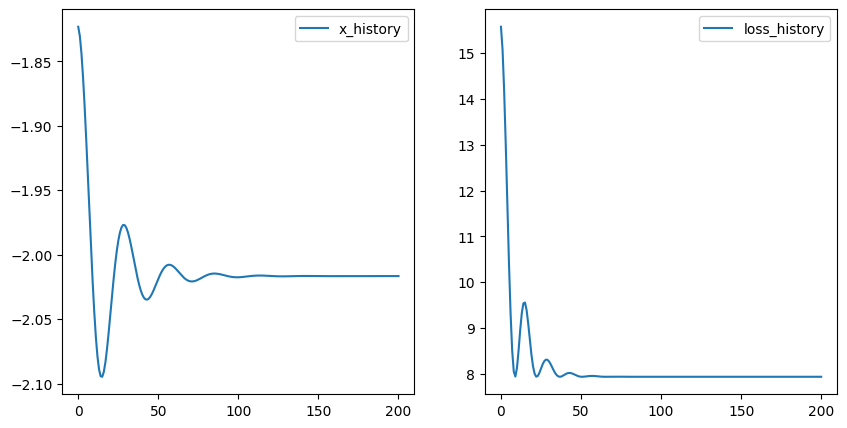

In [16]:
x, x_history, loss_history = lms_momentum( 1e-4, 0.9, 200)

print( f"Last Value Of X: { x}")
print( f"Last Value Of Loss: { loss_history[ -1]}")

plt.figure( figsize=( 10, 5))

plt.subplot( 1, 2, 1)
plt.plot( x_history, label="x_history")
plt.legend()

plt.subplot( 1, 2, 2)
plt.plot( loss_history, label="loss_history")
plt.legend()

#### Conjugate Gradient

In [9]:
def conjugate_gradient( alpha=0.01, n_iter=100):
	x = ( np.random.rand() * 5) - 3

	g = gradient( x)
	p = -g

	loss_history = []
	x_history = []

	for i in range( n_iter):
		loss = main_func( x)
		
		loss_history.append( loss)

		x_history.append( x)

		new_g = gradient( x)

		beta = ( new_g ** 2) / ( g ** 2)
		
		p = -new_g + ( beta * p)

		g = new_g
		
		x += alpha * p

	loss = main_func( x)

	loss_history.append( loss)

	x_history.append( x)

	return x, np.array( x_history), np.array( loss_history)

#### Finding Minimum Using Conugate Gradient Method

Last Value Of X: -2.016612512967163
Last Value Of Loss: 7.933015119820965


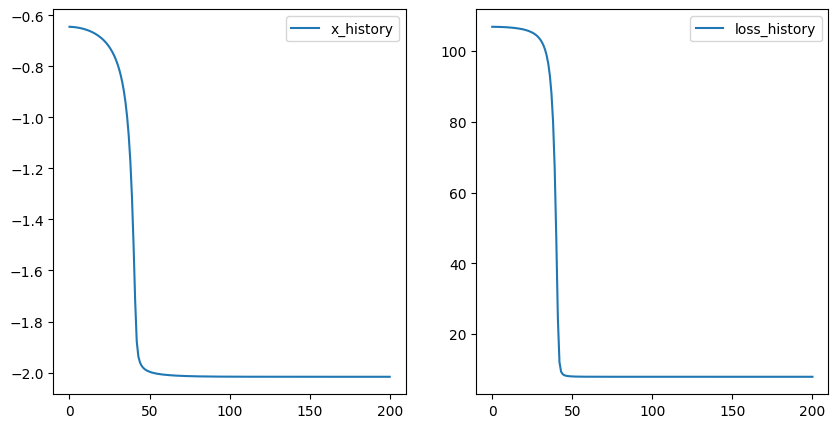

In [10]:
x, x_history, loss_history = conjugate_gradient( 1e-5, 200)

print( f"Last Value Of X: { x}")
print( f"Last Value Of Loss: { loss_history[ -1]}")

plt.figure( figsize=( 10, 5))

plt.subplot( 1, 2, 1)
plt.plot( x_history, label="x_history")
plt.legend()

plt.subplot( 1, 2, 2)
plt.plot( loss_history, label="loss_history")
plt.legend()

#### Levenberg-Marquardt

In [11]:
def levelberg_marquardt( eta=0.01, n_iter=100):
	x = ( np.random.rand() * 5) - 3

	loss_history = []
	x_history = []

	for i in range( n_iter):
		loss = main_func( x)
		
		loss_history.append( loss)

		x_history.append( x)

		g = gradient( x)

		dw = ( 1 / ( ( g ** 2) + eta)) * g
		
		x -= dw

	loss = main_func( x)

	loss_history.append( loss)

	x_history.append( x)

	return x, np.array( x_history), np.array( loss_history)

#### Finding Minimum Using Levenberg-Marquardt Method

Last Value Of X: -2.077666939456422
Last Value Of Loss: 8.907107968815879


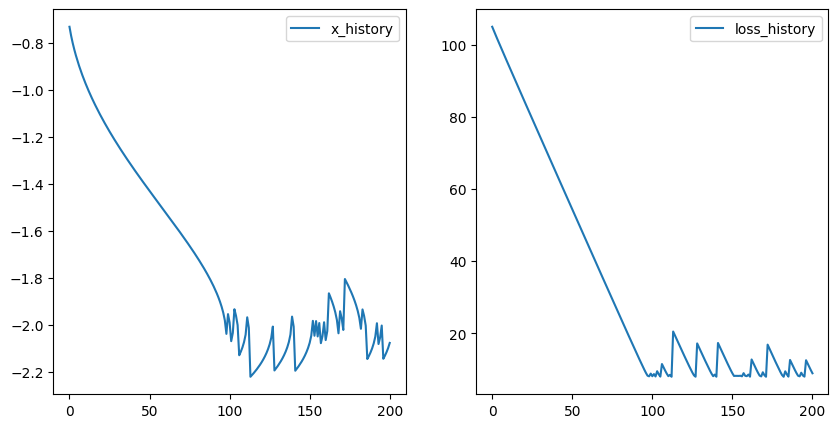

In [13]:
x, x_history, loss_history = levelberg_marquardt( 5, 200)

print( f"Last Value Of X: { x}")
print( f"Last Value Of Loss: { loss_history[ -1]}")

plt.figure( figsize=( 10, 5))

plt.subplot( 1, 2, 1)
plt.plot( x_history, label="x_history")
plt.legend()

plt.subplot( 1, 2, 2)
plt.plot( loss_history, label="loss_history")
plt.legend()